<a href="https://colab.research.google.com/github/thdeandrade/portfolio/blob/main/Analise_dos_Dados_do_Airbnb_Malaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - Málaga/ES**

<center><img alt="Melhores destinos -Málaga" width="80%", height=300, src="https://www.melhoresdestinos.com.br/wp-content/uploads/2019/03/capa-malaga-min.jpg"></center>
<center><a href='https://www.melhoresdestinos.com.br/wp-content/uploads/2019/03/capa-malaga-min.jpg'>Melhores Destinos </a></center>

----



Ahh Andaluzia!

Localizada ao sul da Espanha, a comunidade autônoma é uma das regiões mais incríveis para se conhecer no país. Não tem como viajar por ali sem se deparar com construções históricas, atrações turísticas variadas ou as belíssimas praias. E por falar em praia, já ouviu falar de Málaga? 

Málaga é uma cidade que consegue agradar diversos públicos. Para os amantes da arte em geral, é cidade natal de personalidades como o pintor Pablo Picasso e o ator Antonio Banderas. Para os interessados em história, Málaga conta com  castelos, museus, teatro romano, entre outros. Inclusive, já passaram pela cidade povos como os Fenícios, Romanos e Mouros. Para quem se interessa em algo mais movimentado, a cidade conta com diversos bares, restaurantes, feiras e praias *(e que praias!)*.

E se você faz parte daqueles que gostam de viajar mas não abrem mão do conforto e privacidade, com certeza o Airbnb tem a hospedagem ideal. A plataforma dispõe de imóveis para todos os gostos, que vai desde casas/apartamentos convencionais até aquelas mais inesperadas. Basta escolher a hospedagem que mais agrada, fazer a reserva e combinar com o proprietários os últimos detalhes. Simples assim. 

Se ficou curioso para conhecer mais sobre a cidade, aperte os cintos e boa leitura! 

## Obtenção dos Dados

Em *Python*, não é difícil se deparar com bibliotecas e pacotes com as mais diversas finalidades. Seja para a tarefa mais simples até aquela mais elaborada, as funções prontas possibilitam o usuário ir direito ao que realmente interessa, sem precisar ficar *reinventando a roda*. 










In [21]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
import numpy as np
import plotly.express as px

# para instalação, caso necessário
# !pip install plotly --upgrade

Com a biblioteca ou o pacote requisitado, veja como fica fácil importar um arquivo *csv* com o *pandas*:

In [22]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2020-12-30/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

Os dados fornecidos pelo Airbnb contém diversas informações dos imóveis disponibilizados na plataforma. Para entender melhor o que isso significa, vamos verificar as variáveis de entrada. 

* `id` - número identificador do imóvel.
* `name` - nome da propriedade anunciada.
* `host_id` - número identificador do proprietário (anfitrião).
* `host_name` - nome do anfitrião.
* `neighbourhood_group` - esta coluna não contém nenhum valor válido.
* `neighbourhood` - nome do bairro.
* `latitude` - coordenada da latitude.
* `longitude` - coordenada da longitude.
* `room_type` - tipo de quarto oferecido.
* `price` - preço para alugar o imóvel.
* `minimum_nights` - quantidade mínima de noites para reservar.
* `number_of_reviews` - número de reviews que a propriedade possui.
* `last_review` - data do último review.
* `reviews_per_month` - quantidade de reviews por mês.
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião.
* `availability_365` - número de dias disponíveis ao ano.

Sabendo disso, vamos verificar as cinco primeiras linhas do *dataset*. 


In [23]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,96033,"* Cosy flat 200m from the beach, El Palo/Malaga *",510467,Rafael & Adriana,NaN,Este,36.72031,-4.35627,Entire home/apt,33,3,92,2020-12-14,1.05,1,0
1,97783,dormitorio con cama doble,517193,Ana,NaN,Teatinos-Universidad,36.72394,-4.48072,Private room,30,2,12,2020-01-24,0.16,2,365
2,155696,"Wonderful sunny apartment, 2fl, very central",697056,Zeta,NaN,Centro,36.72723,-4.40720,Entire home/apt,180,3,18,2018-09-25,0.16,2,364
3,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.71934,-4.35942,Private room,17,5,69,2020-10-15,0.61,3,365
4,212845,BEAUTIFUL DOUBLE ROOM IN MALAGA,617998,Valle,NaN,Este,36.72606,-4.36541,Shared room,39,2,36,2020-09-30,0.33,2,273


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Uma das etapas para a resolução de problemas é entender o tipo de dados que serão utilizados. Esse conhecimento permite que o usuário faça a  manipulação correta e adequada para cada tipo de variavel. Se ainda parece confuso, experimente resolver a equação abaixo:

$$
\begin{equation*}
Airbnb + 1 = ?
\end{equation*}
$$

Faz sentido a equação? Para o Python não, e isso acontece pois no universo Python existem os seguintes tipo de dados:

* `str` - caracteres do tipo texto somente ou texto com valores numéricos.
* `int` - números inteiros.
* `float` - números com casas decimais.
* `bool` - valores verdadeiro(`True`) ou falso (`False`).
* `datetime` - valores de data e tempo.

Quando é utilizado a biblioteca *pandas* para importar um dataframe, as variáveis são automaticamente classificadas com tipos semelhantes chamadas de `Pandas dtype`. Os mais comuns detectados são `object`, `int64`, `float64` `bool`e `datetime64`. Esses tipos de dados correspondem ao `str`, `int`, `float` `bool`e `datetime`, respectivamente. O pandas também suporta as variáveis do tipo `timedelta[ns]` e `category`, apesar de serem menos frequentes.
 
 Para o *dataset* do Airbnb, foram detectadas 5248 entradas com 16 variáveis do tipo `int64`, `float64` e `object`.

In [24]:
# identificar o volume de dados do DataFrame
print('--'*22)
print(f'Entradas: {df.shape[0]:>30}')
print(f'Variáveis: {df.shape[1]:>27}')
print('--'*22)

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

--------------------------------------------
Entradas:                           5248
Variáveis:                          16
--------------------------------------------


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Uma etapa importante na organização dos dados é a verificação de valores ausentes. Existem diversas formas de um valor ausente surgir, desde algum erro na hora do preenchimento (manual ou automático) até a ausência da informação de fato.

É possível corrigir esses espaços em branco com os valores mais frequentes, algum valor que faz sentido para aquele local ou simplesmente apagando da análise. Existem diversas formas de tratamento para esses problemas e cada uma delas deve ser cuidadosamente estudada para o caso que será aplicado. Para os dados Airbnb, é possível notar que:

* `neighbourhood_group` tem 100% de valores ausentes.
* `reviews_per_month` e `last_review` possuem aproximadamente 21% de valores ausentes.

Como não serão utilizadas as três variáveis, elas permanecerão no *dataset* sem prejuízos para as demais análises.


In [25]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).round(2).sort_values(ascending=False)

neighbourhood_group               1.00
reviews_per_month                 0.21
last_review                       0.21
availability_365                  0.00
calculated_host_listings_count    0.00
number_of_reviews                 0.00
minimum_nights                    0.00
price                             0.00
room_type                         0.00
longitude                         0.00
latitude                          0.00
neighbourhood                     0.00
host_name                         0.00
host_id                           0.00
name                              0.00
id                                0.00
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Uma maneira de verificar a o comportamento das variáveis é a partir da sua distribuição. Algumas variáveis não são importantes para esse momento e, por isso, serão eliminadas da análise. Vamos manter apenas `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `availability_365`.

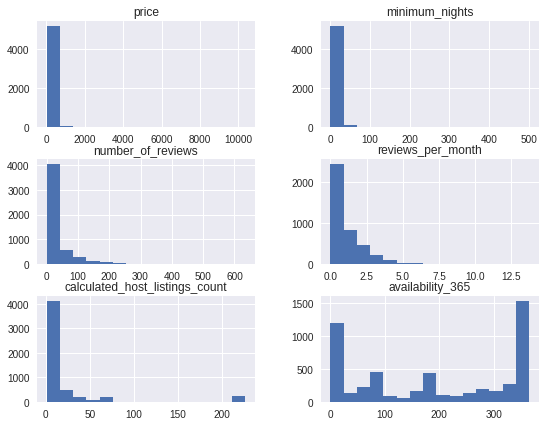

In [26]:
# manter apenas as colunas utilizadas
lista = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# plotar o histograma das variáveis numéricas
df[lista].hist(bins=15, figsize=(9, 7));

Consegue ver algo de estranho?

Observando a variável `price`, as hospedagens vão de €8,00 (valor mínimo) até €10350,00 (valor máximo). Não faz sentido alguém pagar um valor tão caro por um quarto ou residência.

Também é incomum o comportamento da variável `minimum_nights`, onde o mínimo de noites pode variar de 01 a até 500 noites. Sim, Málaga é uma cidade incrível e com muitas atrações, mas alugar uma hospedagem por todos esses dias me parece um tanto exagerado.

Situações incomuns podem alterar o modo em que a informação de uma variável é interpretada, uma vez que foge da normalidade. Essas observações que se destacam e que geram suspeita diante da veracidade dos dados são conhecidos como *outliers*. 

Observando os boxplots a seguir fica fácil perceber como os valores *outliers* são detectados. Essas observações, após o tratamento adequado, ocasiona maior eficiencia na análise e melhor interpretação dos resultados.


      Variável price, valores cima de €100,00: 1226 entradas (23.36%)


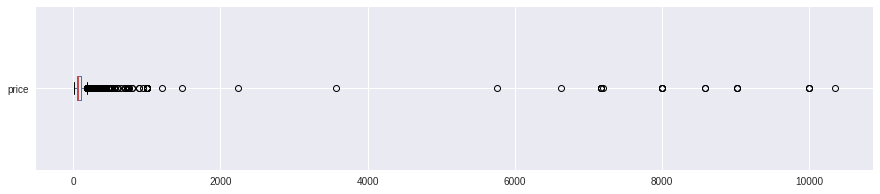

In [27]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3));

print(f'      Variável price, valores cima de €100,00: {len(df[df.price > 100])} entradas ({(((len(df[df.price > 100]) / df.shape[0])*100)):.2f}%)')

            Variável minimum_nights, valores cima de 30 dias: 97 entradas (1.85%)


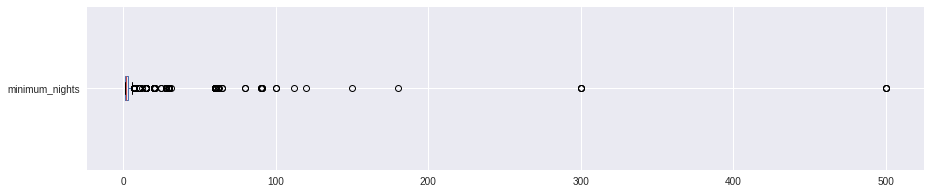

In [28]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3));

print(f'            Variável minimum_nights, valores cima de 30 dias: {len(df[df.minimum_nights > 30])} entradas ({(((len(df[df.minimum_nights > 30]) / df.shape[0])*100)):.2f}%)')

##### **Pausa para limpeza - removendo outliers**

Entre diversas técnicas que lidam com valores *outliers*, e com certeza a mais simples é a detecção seguida de remoção. Para isso, é preciso entender as informações que trazem um *boxplot*:

* `Mínimo` - observação mínima detectada.
* `Primeiro quartil (25%)` - 25% das observações ordenadas estão abaixo e 75% estão acima.
* `Segundo quartil (50%) ou mediana` - separa as observações ordenadas por igual.
* `Terceiro quartil (75%)` - 75% das observações ordenadas estão abaixo e 25% estão acima.
* `Máximo` - observação máxima detectada. 

Para a detecção das observações *outliers* para variável `price`, foi calculado o `Intervalo Interquartil (IQR)` a partir da fórmula:

$$
\begin{equation*}
IQR = Q3 - Q1
\end{equation*}
$$

Para estabelecer uma divisão entre as demais observações, foi calculado o `Limite Superior (Lsup)` do boxplot. Todo o qualquer valor acima desse limite será considerado um *outlier*. 

$$
\begin{equation*}
Lsup = x + (1,5 * IQR)
\end{equation*}
$$

Também é possível calcular o `Limite Inferior (Linf)` mas, como visto no boxplot anterior, não será necessário.

O tratamento da variável `minimum_nights` foi algo mais simples. Do total de observações, apenas foi limitado o valor máximo para 30 noites.   



In [29]:
# price
# intervalo interquartil
q1, q3 = np.percentile(df.price, [25, 75])
iqr = q3 - q1

# limite superior
lim_sup_price = q3+(1.5*iqr)

In [30]:
# cria uma cópia do arquivo
df_clean = df.copy()

# elimina outliers da variável price
df_clean.drop(df_clean[df_clean.price > lim_sup_price].index, axis=0, inplace=True)

# limita a variável minimum_nights
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

Depois da limpeza, a distribução dos dados parece muito mais próximo do real. 

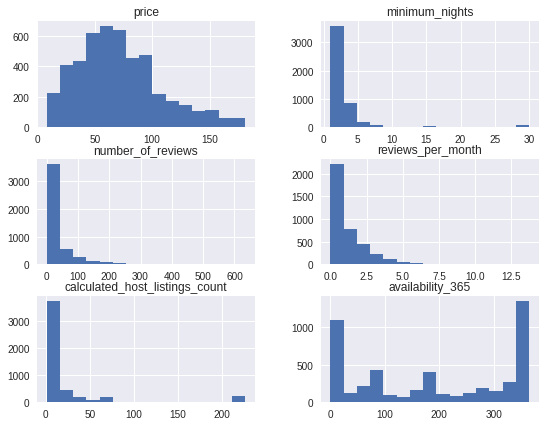

In [31]:
df_clean[lista].hist(bins=15, figsize=(9, 7));

### **Q4. Qual a média dos preços de aluguel?**

Se vai viajar e pretende manter tudo dentro do orçamento, saiba que o Airbnb tem hospedagens com preços que agradam a todos. Somente em Málaga, existem 4796 imóveis disponíveis que estão espalhados por toda a cidade. 

Os anfitriões cobram uma média de €71,25 o aluguel, mas também é possível achar imóveis que vão de €8,00 até €181,00 a locação.

In [32]:
# ver a média da coluna `price`
df_clean.price.describe()

count    4796.000000
mean       71.249374
std        36.147594
min         8.000000
25%        45.000000
50%        66.000000
75%        91.000000
max       181.000000
Name: price, dtype: float64

### **Q5. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Independente do motivo, os anfitriões do Airbnb podem oferecer hospedagens que nos faz sentir como se fosse nossa própria casa pelo tempo que for necessário. 

O período médio para `minimun_nights` é de 2 noites, contudo, existem lugares que vão de uma até trinta noites para garantir a reserva. Tem para todos os gostos!   



In [33]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.describe()

count    4796.000000
mean        2.495830
std         3.621766
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        30.000000
Name: minimum_nights, dtype: float64

### **Q6. Qual a correlação existente entre as variáveis**

As vezes os dados trazem informações escondidas que dificilmente são percebidas sem análises específicas. Entre tantas, uma delas é a análise de correlação, inferência estatística que mede a intensidade da relação entre duas variáveis. Essa intensidade medida vai de 1 (correlação positiva perfeita) a -1 (correlação negativa perfeita). Valores próximos a zero indicam ausência de relação. 

Para obter a correlação, vamos (1) gerar a matriz de correlação entre as variáveis de interesse e (2) criar um *heatmap* a partir da matriz gerada. Os resultados indicam que:

* `numbers_of_reviews` e `reviews_per_month` apresentam correlação forte positiva.
* As demais variáveis apresentam fraca correlação.



In [34]:
# criar uma matriz de correlação
corr = df_clean[lista].corr()

# mostra a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.118684,-0.217628,-0.293638,0.186175,0.109821
minimum_nights,-0.118684,1.000000,0.019014,-0.001484,-0.114150,-0.006405
number_of_reviews,-0.217628,0.019014,1.000000,0.832274,-0.152230,-0.037631
reviews_per_month,-0.293638,-0.001484,0.832274,1.000000,-0.182278,-0.070077
calculated_host_listings_count,0.186175,-0.114150,-0.152230,-0.182278,1.000000,0.071576
availability_365,0.109821,-0.006405,-0.037631,-0.070077,0.071576,1.000000


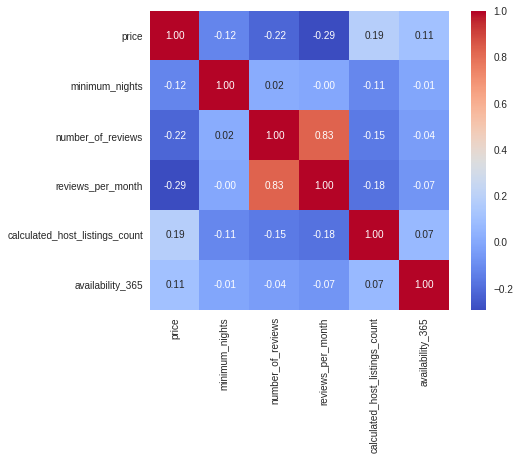

In [35]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', square=True, annot=True);

**Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Diferente de hospedagens convencionais, o Airbnb permite escolher não só onde quer se hospedar e o preço que quer pagar, mas também o tipo de acomodação. 
Tem para todos os gostos, indo desde espaços inteiros, como casa ou apartamento, até um quarto compartilhado em algum hostel.

* Os `Entire home/apt` correspondem a 83.40%.
* Anfitriões oferecem `Entire room` em 15.49% das hospedagens.
* `Hotel Room` e `Shared room` também são oferecidos, mas em menor quantidade. 

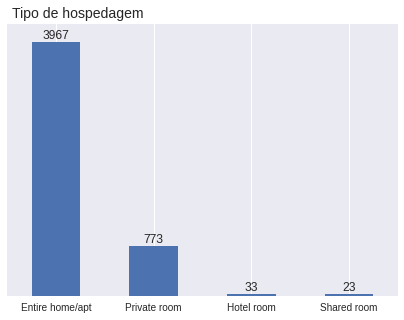

In [36]:
# mostrar a quantidade de cada tipo de imóvel disponível
room = df_clean.room_type.value_counts()
room.plot(kind='bar', figsize=(7, 5))
plt.title('Tipo de hospedagem', fontsize=14, x=0.18)
plt.xticks(rotation='horizontal')
plt.axis([-0.5, 3.5, 0, 4250])
plt.gca().axes.get_yaxis().set_visible(False)

x = [i+1 for i in range(0, 4)]
for i, v in enumerate(room):
    plt.text(x[i] - 1, v + 50 , str(v), fontsize = 12, horizontalalignment='center')

In [37]:
# mostra a porcentagem de cada tipo de imóvel disponível
prop = (df_clean.room_type.value_counts() / df_clean.shape[0])*100
prop

Entire home/apt    82.714762
Private room       16.117598
Hotel room          0.688073
Shared room         0.479566
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Muita gente se sente insegura na busca de hospedagem em cidades desconhecidas. É comum nesse momento aparecer perguntas relacionadas ao custo-benefício do local *(Quanto vai custar? Qual o melhor bairro? É perigoso? Mala grande ou pequena? ...)* Agora imagina que  essa mesma cidade desconhecida fica em outro país. Imaginou? Pois é, talvez a dificuldade seja ainda maior. 

Hospedagens muito caras talvez fiquem fora do orçamento *(ainda mais em Euro!)*, mas hospedagens muito baratas também podem ser dor de cabeça. 

Por sorte, Málaga possui apenas onze distritos em seu território *(isso mesmo, distritos, que se subdividem em bairros)*. Vamos ver o cálculo de **preço médio** dos imóveis na cidade.




In [38]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).round(2)

neighbourhood
Churriana               80.83
Este                    77.23
Campanillas             73.57
Teatinos-Universidad    73.47
Centro                  72.74
Carretera de Cadiz      67.58
Puerto de la Torre      66.74
Palma-Palmilla          60.34
Cruz De Humilladero     58.35
Ciudad Jardin           52.49
Bailen-Miraflores       45.02
Name: price, dtype: float64

A página [Ferias-Espanha](https://www.ferias-espanha.pt/Malaga-cidade/artigos/onde-se-hospedar-em-malaga-numas-ferias) traz algumas informações valiosas sobre alguns dos bairros. 

* `Este`, ou `bairro de El Pablo`, é o ambiente familiar ideal para quem busca diversão, boa comida e praia.
*  Para quem está buscando o lado cultural, artístico e histórico da cidade, o `Centro` é o lugar ideal.
* Apesar do preço mais atrativo, o bairro `Palma-Palmilla` está em uma área periférica e pouco atrativa de Málaga.
* Com preços mais baixos e próximo ao centro, o bairro `Ciudad Jardin` parece ser uma ótima opção para aqueles que buscam o custo-benefício ideal.

E aí, deu vontade de conhecer? Ficou curioso sobre onde conseguir as melhores ofertas/quartos? Também podemos visualizar onde está localizado cada imóvel por preço e tipo de quarto. Dá para ver pela localização que tem acomodações para todos os gostos, preços e localidades. Vale a pena dar uma boa pesquisada para reservar a localidade que melhor se encaixa com as suas necessidades. 

*(Para uma melhor experiência, sugiro utilizar o **Google Colab** ou **Juoyter Notebook**.)*




In [41]:
# plotar os imóveis pela latitude-longitude
fig = px.scatter_mapbox(df_clean, lat='latitude', 
                        lon='longitude', 
                        hover_name='room_type', 
                        hover_data=['host_name', 'neighbourhood', 'price', 'minimum_nights', 'availability_365'], 
                        color='room_type',
                        size='price', 
                        mapbox_style='open-street-map',
                        width = 1000,
                        height = 500,
                        center = dict(lat=36.72, lon=-4.42),
                        zoom=3,
                        )
fig.show()

## **Conclusões**

Fechamos por aqui o *tour* pelas hospedagens disponibilizados pelo *Airbnb*. Apesar de simples, os dados trouxeram informações importantes para quem busca uma hospedagem em Málaga. 

Foram identificados valores *outliers* muito acima do que espera-se encontrar para uma hospedagem. Por esse motivo, as variáveis `minimum_nights` e `price` foram limitados com valores próximos a realidade. 

A matriz de correlação foi capaz de medir a dependência que uma variável tem da outra. As  variáveis `reviews_per_month` e `number_of_reviews` obtiveram correlação de 0.83, sendo considerada como forte positiva. 

Os dados também mostram que as hospedagens mais cara da variável `neighbourhood` não é necessariamente a melhor. Existem acomodações para diversos públicos e, por isso, é possível encontrar facilmente lugares com melhor custo-benefício.  

Seja para trabalho, passeio ou qualquer outro motivo, Málaga vai te trazer momentos incríveis. **Disfruta el espectáculo!**


